# **Standardizing Images**

In order to train the network every image needed to be uniform in shape and size. I opted to square every image using zero padding. Afterwards I downsized every image to 128x128. 

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import shutil
%matplotlib inline

## **Squaring Images**

Using OpenCV this function squares off an image by adding black bars to both ends of the shortest dimension of said image.

In [6]:
# Returns a copy of the 'src' image with black bars to make it square
def square_image(src):
    (y, x, _) = src.shape
    dimension = np.max(src.shape)
    top = int((dimension - src.shape[0]) / 2)
    bottom = dimension - y - top
    left = int((dimension - src.shape[1]) / 2)
    right = dimension - x - left
    return cv2.copyMakeBorder(src, top, bottom, left, right, cv2.BORDER_CONSTANT)

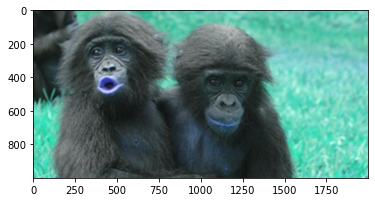

In [15]:
src1 = cv2.imread('test_horiz.jpg')
plt.imshow(src1)

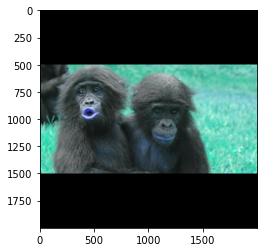

In [16]:
img1 = square_image(src1)
plt.imshow(img1)

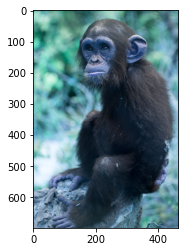

In [17]:
src2 = cv2.imread('test_vert.jpg')
plt.imshow(src2)

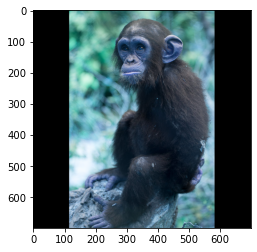

In [18]:
img2 = square_image(src2)
plt.imshow(img2)

## **Downsizing Images** 

Once again using OpenCV, this function downsizes an image to the desired resolution.

In [19]:
# Downsizes image to a square of default dimension (128, 128)
def resize_image(src, dimension = 128):
    size = (dimension, dimension)
    return cv2.resize(src, size)

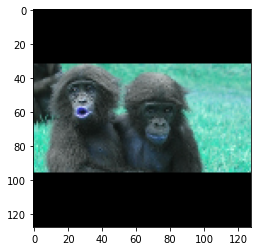

In [20]:
img1_small = resize_image(img1)
plt.imshow(img1_small)

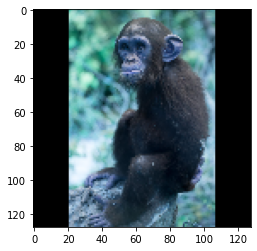

In [21]:
img2_small = resize_image(img2)
plt.imshow(img2_small)

## **Squaring and Downsizing an Entire Directory**

This function simply applies the previous two functions to an entire directory and outputs the result to a new directory of the same name except with '_pp' appended to the end.

The cell following simply applies this function to every subdirectory in the 'images' directory.

In [46]:
# Square and resize every image inside of the given 'directory'
def standardize_images(directory):
    output_directory = directory + '_pp'
    if os.path.isdir(output_directory) == False:
        os.mkdir(output_directory)
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png') or filename.endswith('.JPG') or filename.endswith('.JPEG') or filename.endswith('.PNG'):
            target = output_directory + '\\' + filename
            src = cv2.imread(directory + '\\' + filename)
            img = square_image(src)
            img = resize_image(img)
            cv2.imwrite(target, img)


In [50]:
# Standardize every image in every directory within the 'images' directory
for directory in os.listdir('images'):
    standardize_images('images\\' + directory)

## **Reorganization**

The next two cells simply organize the preprocessed images into their own directory and remove the '_pp' suffix.

In [3]:
# Move preprocessed image folders to their own directory
for directory in os.listdir('images'):
    if directory.endswith('_pp'):
        shutil.move('images\\' + directory, 'images_pp\\' + directory)

In [16]:
# Remove '_pp' from end of folder name to make labeling simpler
for directory in os.listdir('images_pp'):
    if directory.endswith('_pp'):
        os.rename('images_pp\\' + directory, 'images_pp\\' + directory[:-3])
    

## **Result**

We now have a folder 'images_pp' that contains the same structure as 'images', but now every image is squared and resized and thus ready to be used in training the neural network.